In [135]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [147]:
count = 10000
r = np.random.uniform(size=count)
lambd = 1

In [138]:
def poisson(r, lambd):
    x = 0
    sum = np.exp(-lambd)
    term = sum
    while r > sum:
        x += 1
        term *= lambd / x
        sum += term
    return x

In [148]:
poissonVals = [poisson(x, lambd) for x in r]

In [140]:
m = lambd
d = lambd

In [163]:

matrix = np.tile(poissonVals, (count, 1))
triangularMatrix = np.tril(matrix)

sums = triangularMatrix.sum(1)
rang = range(1, count+1)

m_ = np.divide(sums, rang)

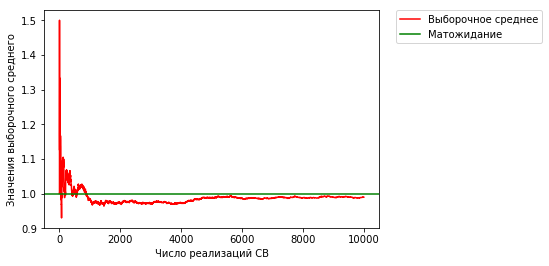

In [164]:

plt.plot(rang, m_, 'r', label = 'Выборочное среднее')
plt.axhline(m, color = 'g', label = 'Матожидание')
plt.xlabel('Число реализаций СВ')
plt.ylabel('Значения выборочного среднего')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [151]:
dMatrix = triangularMatrix - m_
sums = np.square(dMatrix).sum(1)

d_ = np.divide(sums, rang)

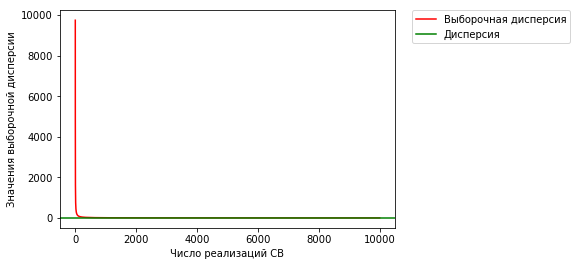

In [152]:

plt.plot(rang, d_, 'r', label = 'Выборочная дисперсия')
plt.axhline(d, color = 'g', label = 'Дисперсия')
plt.xlabel('Число реализаций СВ')
plt.ylabel('Значения выборочной дисперсии')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [160]:
def poissonProb(x, lamdb):
    return lamdb**x*math.exp(-lamdb)/math.factorial(x)

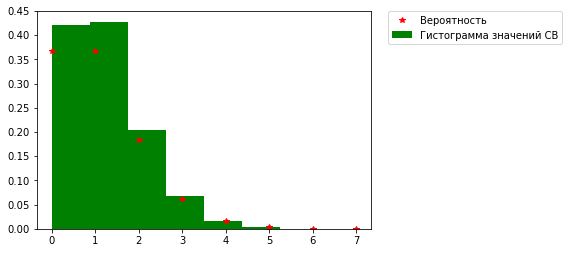

In [161]:

setVals = set(poissonVals)
props = [poissonProb(x, lambd) for x in setVals]

plt.plot(list(setVals), props, 'r*', label = 'Вероятность')
plt.hist(poissonVals, normed = 1, bins = len(setVals), color = 'green',label = 'Гистограмма значений СВ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()